# Project: Investigate a Wine Quality Dataset
[Datset Source](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)<br>
***Muthukumar Palavesam***

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

> In this project I will go ahead and explore the answers for the below questions:<br>
> - What chemical characteristics are most important in predicting the quality of wine?
> - Is a certain type of wine (red or white) associated with higher quality?
> - Do wines with higher alcoholic content receive better ratings?
> - Do sweeter wines (more residual sugar) receive better ratings?
> - What level of acidity receives the highest average rating?

In [410]:
#import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://discuss.analyticsvidhya.com/t/how-to-make-a-text-bold-within-print-statement-in-ipython-notebook/14552
from IPython.display import display,Markdown
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [354]:
# Load your data and print out a few lines. Perform operations to inspect data
wine_red=pd.read_csv('winequality-red.csv')
wine_white=pd.read_csv('winequality-white.csv')

In [355]:
#print out a few lines of red wine
wine_red.head(2)

,fixed_acidity;volatile_acidity;citric_acid;residual_sugar;chlorides;free_sulfur_dioxide;total_sulfur-dioxide;density;pH;sulphates;alcohol;quality
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5


In [356]:
#print out a few lines of white wine
wine_white.head(2)

,fixed_acidity;volatile_acidity;citric_acid;residual_sugar;chlorides;free_sulfur_dioxide;total_sulfur_dioxide;density;pH;sulphates;alcohol;quality
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...


we noticed that the seperation is showing as ';' in both dataset, so will load data with include `sep` keyword

In [357]:
wine_red=pd.read_csv('winequality-red.csv',sep=';')
wine_white=pd.read_csv('winequality-white.csv',sep=';')

In [358]:
#print out a few lines of red wine
wine_red.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [359]:
#print out a few lines of white wine
wine_white.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


### Data Cleaning
> - Assessing Data
> - Rename the column
> - Adding New column `color` in dataset
> - Appending the dataset
> - Adding New column `acidity_levels` in dataset
> - Saving the merged Dataset

#### Data Cleaning- Assessing Data
> - number of samples in each dataset
> - number of columns in each dataset
> - features with missing values
> - duplicate rows in the white wine dataset
> - number of unique values for quality in each dataset
> - mean density of the red wine dataset

In [413]:
#number of samples in each dataset
display(Markdown('***`Number of samples and columns in Each dataset`***'))
print('Red wine has {} rows and {} columns'.format(wine_red.shape[0],wine_red.shape[1]))
print('White wine has {} rows and {} columns'.format(wine_white.shape[0],wine_red.shape[1]))

***`Number of samples and columns in Each dataset`***

Red wine has 1599 rows and 13 columns
White wine has 4898 rows and 13 columns


In [361]:
#Missing Values
display(Markdown('***`Red Wine Missing values:`***'))
display(wine_red.isnull().sum())
display(Markdown('***`White Wine Missing values:`***'))
display(wine_white.isnull().sum())

***`Red Wine Missing values:`***

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur-dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

***`White Wine Missing values:`***

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From above results no missing values found

In [362]:
#Duplicate Rows count in each dataset
display(Markdown('***`Red Wine duplicated rows count`***'))
display(sum(wine_red.duplicated()))
display(Markdown('***`White Wine duplicated rows count`***'))
display(sum(wine_white.duplicated()))

***`Red Wine duplicated rows count`***

240

***`White Wine duplicated rows count`***

937

In [363]:
#Unique Values of each dataset
display(Markdown('***`Red Wine unique values`***'))
display(wine_red.nunique())
display(Markdown('***`White Wine unique values`***'))
display(wine_white.nunique())

***`Red Wine unique values`***

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur-dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

***`White Wine unique values`***

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [364]:
#mean density of the red wine dataset
display(Markdown('***`Mean density of the red wine dataset`***'))
display(wine_red['density'].mean())
display(Markdown('***`Mean density of the red wine dataset`***'))
display(wine_white['density'].mean())

***`Mean density of the red wine dataset`***

0.9967466791744833

***`Mean density of the red wine dataset`***

0.9940273764801896

#### Data Cleaning - Rename the column

In [365]:
display(Markdown('***Red Wine Column Names:***'))
display(wine_red.columns.sort_values())
display(Markdown('***White Wine Column Names:***'))
display(wine_white.columns.sort_values())

***Red Wine Column Names:***

Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur-dioxide', 'volatile_acidity'],
      dtype='object')

***White Wine Column Names:***

Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')

what I observed is, the column in red wine "total_sulfur-dioxide" is not matching with column in white wine. So need to change that

In [366]:
#Renaming the column 'total_sulfur-dioxide' from red wine data frame using 'rename' function

wine_red.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'},inplace=True)

In [367]:
#Recheck the column name by fetching sample records
wine_red.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


Now the column name has been changed and look like similar column names in both dataframes

#### Data Cleaning- Adding New column in dataset

***Adding New Column `color`***<br>

We are going to add the column name `color` into both the dataset and adding `red` into `redwine dataset`,`White` in `whitewine dataset`using the `Numpy's repeat` function.[Numpy Repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html)<br>
numpy.repeat(a, repeats, axis=None)

In [368]:
#Adding column color and value red into wine_red dataset
wine_red['color']=np.repeat('red',wine_red.shape[0])
#Adding column color and value white into wine_white dataset
wine_white['color']=np.repeat('white',wine_white.shape[0])

In [369]:
#fetching some rows to confimr whether the column is showing or not
wine_red.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [370]:
wine_white.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white


In [371]:
#number of samples in each dataset after adding the column color
display(Markdown('***`Number of samples and columns in Each dataset`***'))
print('Red wine has {} rows and {} columns'.format(wine_red.shape[0],wine_red.shape[1]))
print('White wine has {} rows and {} columns'.format(wine_white.shape[0],wine_red.shape[1]))

***`Number of samples and columns in Each dataset`***

Red wine has 1599 rows and 13 columns
White wine has 4898 rows and 13 columns


#### Data Cleaning- Appending the dataset

In [372]:
#Append dataframe using `append` function
df=wine_red.append(wine_white)

In [373]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Data Cleaning- Adding New column `acidity_levels` in dataset
***Adding New Column `acidity_levels`***<br>
we are going to add the column `acidity_levels` to show acidity level groups. to achieve this going to use pandas `cut` function
[panda's cut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)

In [374]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [375]:
# Bin edges that will be used to "cut" the data into groups
bin_edges=[2.72,3.11,3.21,3.32,4.01]

In [376]:
# Labels for the four acidity level groups. always bin_names length will be `len(bin_edges)-1`
# pH 2.72 to 3.11 = high
# pH 3.12 to 3.21 = mod_high
# pH 3.22 to 3.32 = medium
# pH 3.33 to 4.01 = low
bin_names=['high','mod_high','medium','low']

In [377]:
#adding column
df['acidity_levels']=pd.cut(df['pH'],bin_edges,labels=bin_names)

In [378]:
#recheck the dataframe
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high


In [379]:
#checking append rows are matching or not. if the result returns True then matching
wine_red.shape[0]+wine_white.shape[0]==df.shape[0]

True

#### Data Cleaning- Saving the merged Dataset

In [380]:
#Saving the merged Dataset
df.to_csv('cleaned_wine_data.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

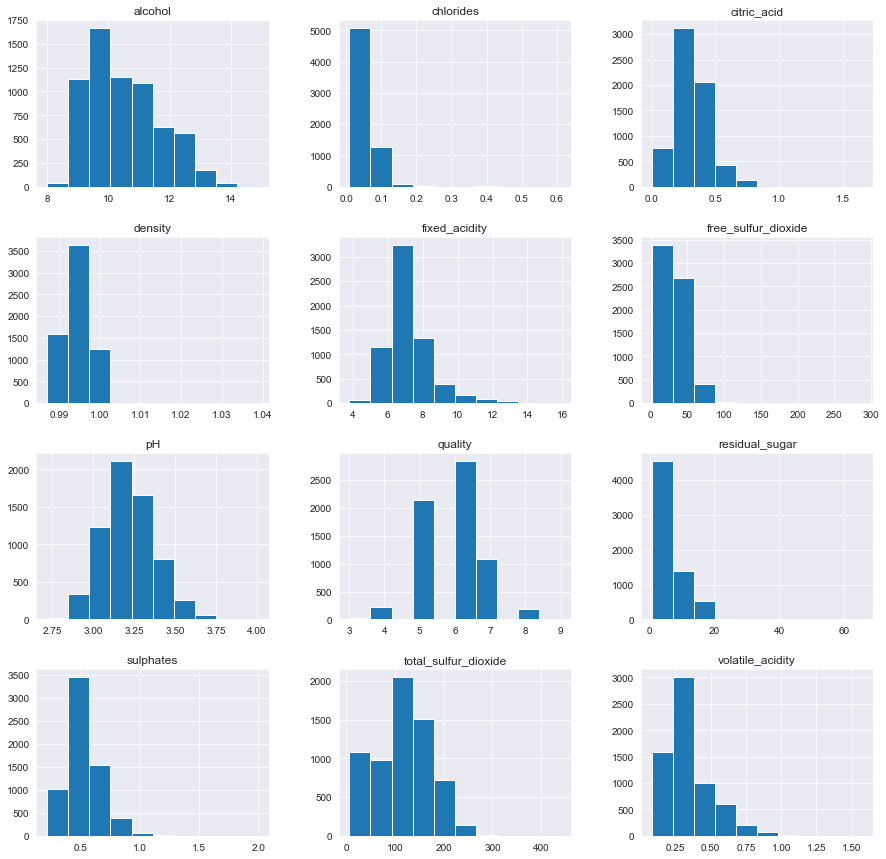

In [381]:
# Loading the cleaned Data and Exploring the histogram of the data looks like
wine_data=pd.read_csv('cleaned_wine_data.csv')
wine_data.hist(figsize=(15,15));

Based on the above histograms, the `alcohol` and `fixed_acidity` appear `skewed to the right`

### scatterplots of quality against different feature variables

### Research Question 2 : which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

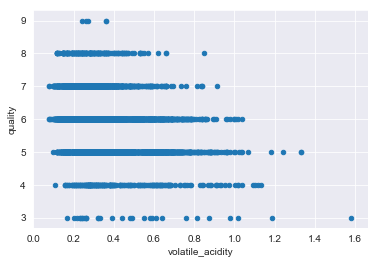

In [382]:
wine_data.plot(x='volatile_acidity',y='quality',kind='scatter');

low volatile acitidity has the high quality

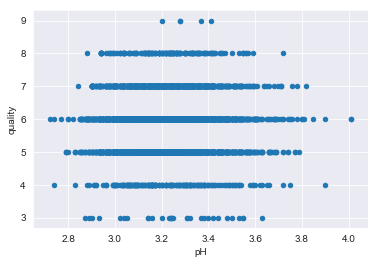

In [383]:
wine_data.plot(x='pH',y='quality',kind='scatter');

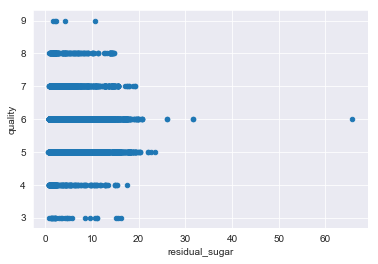

In [384]:
wine_data.plot(x='residual_sugar',y='quality',kind='scatter');

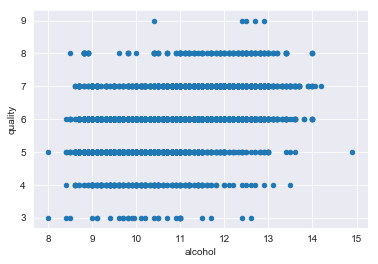

In [385]:
wine_data.plot(x='alcohol',y='quality',kind='scatter');

Based on the above scatter plots,`Alcohol` is most likely to have a `positive impact on quality`

### Research Question 3 : what are all the available Quality in dataset

In [386]:
#available quality levels
sorted(list(wine_data['quality'].unique()))

[3, 4, 5, 6, 7, 8, 9]

So from above results, the available qualities are `3, 4, 5, 6, 7, 8, 9`

### Research Question 4 : What is the mean pH value of the each quality

In [387]:
wine_data.groupby('quality')['pH'].mean()

quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64

### Research Question 5 : What is the mean pH value of  each quality in each color

In [388]:
wine_data.groupby(['quality','color'])['pH'].mean()

quality  color
3        red      3.398000
         white    3.187500
4        red      3.381509
         white    3.182883
5        red      3.304949
         white    3.168833
6        red      3.318072
         white    3.188599
7        red      3.290754
         white    3.213898
8        red      3.267222
         white    3.218686
9        white    3.308000
Name: pH, dtype: float64

In [389]:
wine_data.groupby(['quality','color'],as_index=False)['pH'].mean().style.hide_index()

quality,color,pH
3,red,3.398
3,white,3.1875
4,red,3.38151
4,white,3.18288
5,red,3.30495
5,white,3.16883
6,red,3.31807
6,white,3.1886
7,red,3.29075
7,white,3.2139


### Research Question 6 : Counts by Wine Color and Quality

quality  color
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: pH, dtype: int64

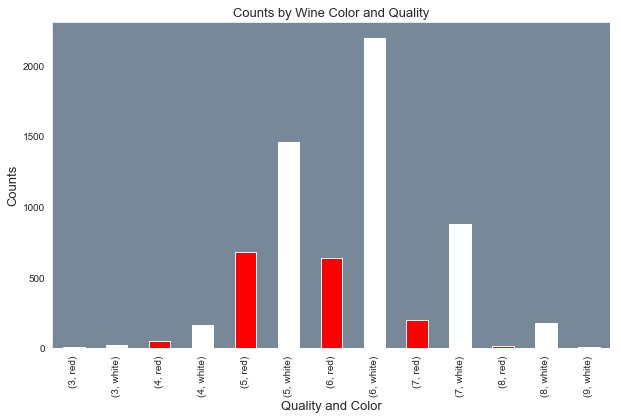

In [403]:
#http://jonathansoma.com/lede/data-studio/matplotlib/changing-the-background-of-a-pandas-matplotlib-graph/
#Counts by Wine Color and Quality
counts=wine_data.groupby(['quality','color']).count()['pH']
display(counts)
ax=counts.plot(kind='bar',color=['r','w'],figsize=(10,6),grid=False)
ax.set_facecolor('lightslategrey')
ax.set_xlabel('Quality and Color',fontsize=13)
ax.set_ylabel('Counts',fontsize=13)
plt.title('Counts by Wine Color and Quality',fontsize=13);

First, there's clearly more white samples than red samples.So it's hard to make a fair comparison, we just count.To balance this out,let's divide each count by the total count for that color to use proportions instead.

### Research Question 7  : Proportion by Wine Color and Quality

quality  color
3        red      0.006254
         white    0.004083
4        red      0.033146
         white    0.033279
5        red      0.425891
         white    0.297468
6        red      0.398999
         white    0.448755
7        red      0.124453
         white    0.179665
8        red      0.011257
         white    0.035729
9        white    0.001021
Name: pH, dtype: float64

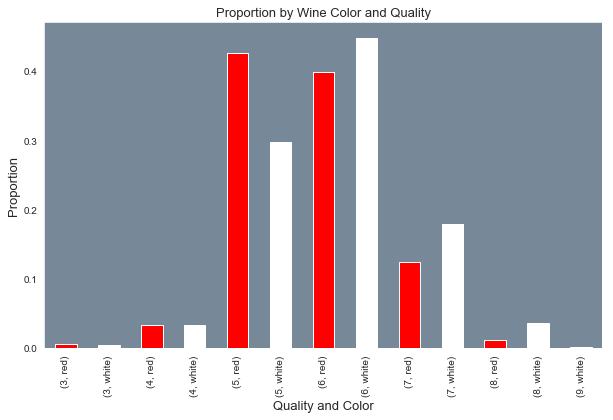

In [402]:
#Proportion by Wine Color and Quality
totals=wine_data.groupby('color').count()['pH']
proportions=counts/totals
display(proportions)
ax=proportions.plot(kind='bar',color=['r','w'],figsize=(10,6),grid=False);
ax.set_facecolor('lightslategrey');
ax.set_xlabel('Quality and Color',fontsize=13);
ax.set_ylabel('Proportion',fontsize=13);
ax.set_title('Proportion by Wine Color and Quality',fontsize=13);

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [392]:
# get counts for each rating and color
color_counts=wine_data.groupby(['color','quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [393]:
# get total counts for each color
color_total=wine_data.groupby('color').count()['pH']
color_total

color
red      1599
white    4898
Name: pH, dtype: int64

In [394]:
# get proportions by dividing red rating counts by total # of red samples
red_proportion=color_counts['red']/color_total['red']
#we're missing a red wine value for a the 9 rating
red_proportion[9]=0
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [395]:
# get proportions by dividing white rating counts by total # of white samples
white_proportion=color_counts['white']/color_total['white']
white_proportion

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

Current Figure size:[10.0, 6.0]


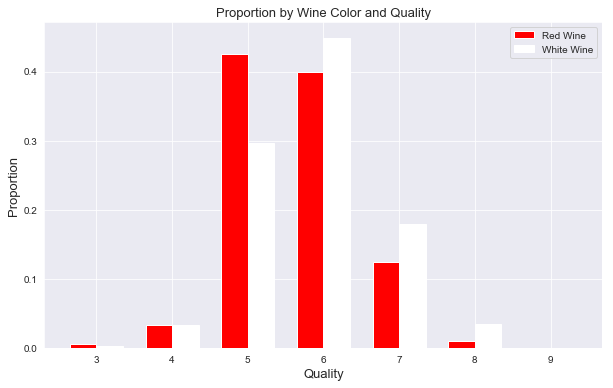

In [417]:
#https://www.youtube.com/watch?v=ffALfovKud4
#https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
import seaborn as sns
sns.set_style('darkgrid')
ind=np.arange(len(red_proportion))    # the x locations for the groups
fig_size = plt.rcParams["figure.figsize"]
print ("Current Figure size:{}".format(fig_size))
# plot bars
plt.bar(ind,red_proportion,color='r',width=0.35,label='Red Wine')
plt.bar(ind+0.35,white_proportion,color='w',width=0.35,label='White Wine')

# title and labels
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
locations = ind + width / 2
plt.xticks(locations, labels)
plt.xlabel('Quality',fontsize=13)
plt.ylabel('Proportion',fontsize=13)
plt.title('Proportion by Wine Color and Quality',fontsize=13)
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.legend();

> - From this above graph , the quality 6 in white wine is more and quality 5 in red wine is more

### Research Question 8  : What is the Average Wine Quality by color

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

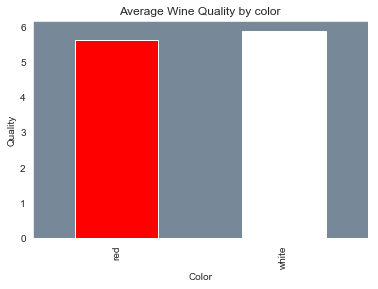

In [401]:
#Average Wine Quality by color
display(wine_data.groupby('color')['quality'].mean())
ax=wine_data.groupby('color')['quality'].mean().plot(kind='bar',color=['r','w'],figsize=(6,4),grid=False)
ax.set_facecolor("lightslategray")
plt.title('Average Wine Quality by color');
plt.xlabel('Color');
plt.ylabel('Quality');

> - So mean quality of redwine is less than white wine

### Research Question 9  : What level of acidity receives the highest average rating?

acidity_levels
low         5.859593
medium      5.850832
mod_high    5.784540
high        5.783343
Name: quality, dtype: float64

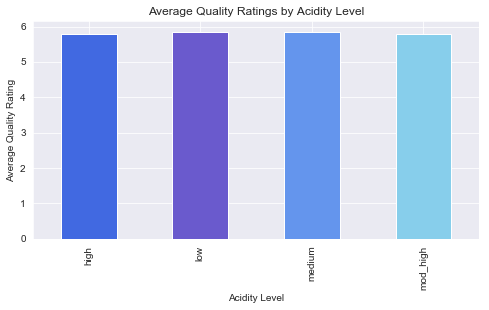

In [398]:
#Average Quality Ratings by Acidity Level
display(wine_data.groupby('acidity_levels')['quality'].mean().sort_values(ascending=False))
wine_data.groupby('acidity_levels')['quality'].mean().plot(kind='bar',figsize=(8,4),\
color=['royalblue','slateblue','cornflowerblue','skyblue'])
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

> - So From above results, the low level of acidity receives the highest mean quality rating

### Research Question 10 : Do wines with higher alcoholic content receive better ratings?

***`mean quality rating for the Low alcohol`***

5.475920679886686

***`mean quality rating for the High alcohol`***

6.146084337349397

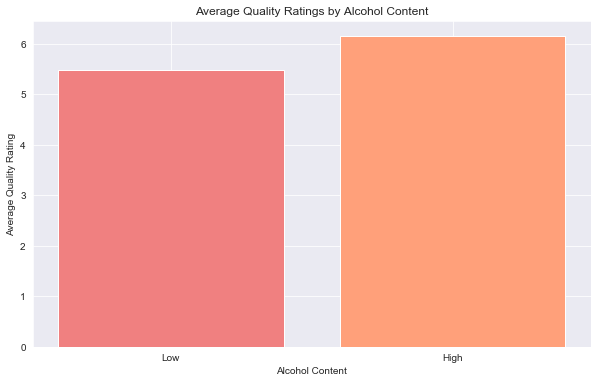

In [399]:
#Do wines with higher alcoholic content generally receive better ratings?Yes
mean_quality_low=wine_data.query('alcohol < alcohol.median()').quality.mean()
mean_quality_high=wine_data.query('alcohol >= alcohol.median()').quality.mean()
display(Markdown('***`mean quality rating for the Low alcohol`***'))
display(mean_quality_low)
display(Markdown('***`mean quality rating for the High alcohol`***'))
display(mean_quality_high)

plt.bar([1,2],[mean_quality_low,mean_quality_high],tick_label=['Low','High'],color=['lightcoral','lightsalmon']);
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

> - From above plot, the higher alcoholic content receive better ratings.

### Research Question 11 : Do sweeter wines receive higher ratings?

***`mean quality rating for the Low sugar`***

5.808800743724822

***`mean quality rating for the High sugar`***

5.82782874617737

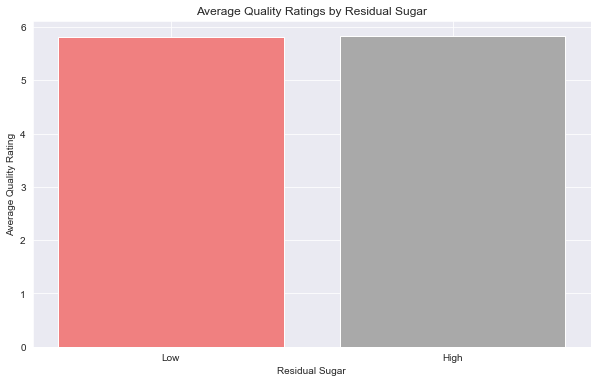

In [400]:
#Do sweeter wines generally receive higher ratings? Yes
mean_quality_low_sugar=wine_data.query('residual_sugar < residual_sugar.median()').quality.mean()
mean_quality_high_sugar=wine_data.query('residual_sugar >= residual_sugar.median()').quality.mean()
display(Markdown('***`mean quality rating for the Low sugar`***'))
display(mean_quality_low_sugar)
display(Markdown('***`mean quality rating for the High sugar`***'))
display(mean_quality_high_sugar)

plt.bar([1,2],[mean_quality_low_sugar,mean_quality_high_sugar],tick_label=['Low','High'],color=['lightcoral','darkgrey']);
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating')
plt.title('Average Quality Ratings by Residual Sugar');

> - From above Plot the sweeter wines received the higher ratings